In [1]:
# Lab 5 Performance Visualization

#This notebook creates the required plots for the Lab 5 report:#
#1. Performance comparison bar chart
#2. Iteration-by-iteration timing comparison
#3. Speedup visualization
#4. Histogram comparison
#5. Summary table

In [2]:
# Import required libraries
%pip install pandas matplotlib numpy seaborn --user

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully")

Note: you may need to restart the kernel to use updated packages.
✓ Libraries imported successfully


In [4]:
def load_benchmark_data(filename='layer1_benchmark_results.csv'):
    """Load benchmark data from CSV file"""
    try:
        df = pd.read_csv(filename)
        print(f"Loaded {len(df)} iterations from {filename}")
        return df
    except FileNotFoundError:
        print(f"Error: Could not find {filename}")
        print("Make sure you've run the C++ benchmark program first!")
        return None

def calculate_statistics(df):
    """Calculate and print statistics"""
    stats = {
        'Naive': {
            'mean': df['Naive_ms'].mean(),
            'median': df['Naive_ms'].median(),
            'min': df['Naive_ms'].min(),
            'max': df['Naive_ms'].max(),
            'std': df['Naive_ms'].std()
        },
        'Optimized': {
            'mean': df['Optimized_ms'].mean(),
            'median': df['Optimized_ms'].median(),
            'min': df['Optimized_ms'].min(),
            'max': df['Optimized_ms'].max(),
            'std': df['Optimized_ms'].std()
        }
    }

    speedup = stats['Naive']['mean'] / stats['Optimized']['mean']
    improvement = ((stats['Naive']['mean'] - stats['Optimized']['mean']) / stats['Naive']['mean']) * 100

    print("\n" + "="*60)
    print("PERFORMANCE STATISTICS")
    print("="*60)
    print(f"\nNaive Implementation:")
    print(f"  Mean:   {stats['Naive']['mean']:.3f} ms")
    print(f"  Median: {stats['Naive']['median']:.3f} ms")
    print(f"  Std:    {stats['Naive']['std']:.3f} ms")

    print(f"\nCache-Optimized Implementation:")
    print(f"  Mean:   {stats['Optimized']['mean']:.3f} ms")
    print(f"  Median: {stats['Optimized']['median']:.3f} ms")
    print(f"  Std:    {stats['Optimized']['std']:.3f} ms")

    print(f"\nPerformance Gain:")
    print(f"  Speedup:     {speedup:.2f}x")
    print(f"  Improvement: {improvement:.1f}%")
    print("="*60 + "\n")

    return stats, speedup, improvement

In [5]:
def plot_comparison_bars(stats, speedup, improvement):
    """Create bar chart comparing mean performance"""
    fig, ax = plt.subplots(figsize=(10, 6))

    implementations = ['Naive', 'Cache-Optimized']
    means = [stats['Naive']['mean'], stats['Optimized']['mean']]
    stds = [stats['Naive']['std'], stats['Optimized']['std']]
    colors = ['#e74c3c', '#2ecc71']

    bars = ax.bar(implementations, means, yerr=stds, capsize=10,
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

    # Add value labels on bars
    for i, (bar, mean) in enumerate(zip(bars, means)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{mean:.1f} ms',
                ha='center', va='bottom', fontweight='bold', fontsize=12)

    # Add speedup annotation
    ax.text(1, stats['Optimized']['mean'] + stats['Optimized']['std'] + 20,
            f'Speedup: {speedup:.2f}x\n({improvement:.1f}% faster)',
            ha='center', fontsize=13, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

    ax.set_ylabel('Execution Time (ms)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Implementation', fontsize=13, fontweight='bold')
    ax.set_title('Layer 1 Performance Comparison (100 Iterations)',
                 fontsize=15, fontweight='bold', pad=20)
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('plot1_performance_comparison.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: plot1_performance_comparison.png")
    plt.show()

def plot_iteration_timings(df):
    """Plot timing for each iteration"""
    fig, ax = plt.subplots(figsize=(14, 6))

    iterations = df['Iteration']

    ax.plot(iterations, df['Naive_ms'], label='Naive',
            color='#e74c3c', linewidth=1.5, alpha=0.7)
    ax.plot(iterations, df['Optimized_ms'], label='Cache-Optimized',
            color='#2ecc71', linewidth=1.5, alpha=0.7)

    # Add mean lines
    naive_mean = df['Naive_ms'].mean()
    optimized_mean = df['Optimized_ms'].mean()
    ax.axhline(y=naive_mean, color='#e74c3c', linestyle='--',
               linewidth=2, alpha=0.5, label=f'Naive Mean: {naive_mean:.1f} ms')
    ax.axhline(y=optimized_mean, color='#2ecc71', linestyle='--',
               linewidth=2, alpha=0.5, label=f'Optimized Mean: {optimized_mean:.1f} ms')

    ax.set_xlabel('Iteration', fontsize=13, fontweight='bold')
    ax.set_ylabel('Execution Time (ms)', fontsize=13, fontweight='bold')
    ax.set_title('Layer 1 Timing - All 100 Iterations',
                 fontsize=15, fontweight='bold', pad=20)
    ax.legend(loc='upper right', fontsize=11)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('plot2_iteration_timings.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: plot2_iteration_timings.png")
    plt.show()

def plot_speedup_visualization(df, speedup):
    """Create a visualization showing the speedup"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Left plot: Box plot comparison
    data_to_plot = [df['Naive_ms'], df['Optimized_ms']]
    bp = ax1.boxplot(data_to_plot, labels=['Naive', 'Cache-Optimized'],
                     patch_artist=True, widths=0.6)

    colors = ['#e74c3c', '#2ecc71']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax1.set_ylabel('Execution Time (ms)', fontsize=12, fontweight='bold')
    ax1.set_title('Distribution Comparison', fontsize=13, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)

    # Right plot: Speedup bar
    ax2.barh(['Speedup'], [speedup], color='#3498db', alpha=0.8,
             edgecolor='black', linewidth=1.5)
    ax2.axvline(x=1.0, color='red', linestyle='--', linewidth=2,
                label='Baseline (1.0x)')
    ax2.set_xlabel('Speedup Factor', fontsize=12, fontweight='bold')
    ax2.set_title(f'Overall Speedup: {speedup:.2f}x',
                  fontsize=13, fontweight='bold')
    ax2.legend()
    ax2.grid(axis='x', alpha=0.3)

    # Add speedup text
    ax2.text(speedup/2, 0, f'{speedup:.2f}x',
             ha='center', va='center', fontsize=16, fontweight='bold',
             color='white')

    plt.tight_layout()
    plt.savefig('plot3_speedup_visualization.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: plot3_speedup_visualization.png")
    plt.show()

def plot_histogram_comparison(df):
    """Create histogram showing distribution of timings"""
    fig, ax = plt.subplots(figsize=(12, 6))

    bins = 30
    ax.hist(df['Naive_ms'], bins=bins, alpha=0.6, color='#e74c3c',
            label='Naive', edgecolor='black', linewidth=0.5)
    ax.hist(df['Optimized_ms'], bins=bins, alpha=0.6, color='#2ecc71',
            label='Cache-Optimized', edgecolor='black', linewidth=0.5)

    ax.set_xlabel('Execution Time (ms)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=13, fontweight='bold')
    ax.set_title('Distribution of Execution Times (100 Iterations)',
                 fontsize=15, fontweight='bold', pad=20)
    ax.legend(fontsize=12)
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('plot4_histogram_comparison.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: plot4_histogram_comparison.png")
    plt.show()

def create_summary_table(stats, speedup, improvement):
    """Create a summary table image"""
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')

    table_data = [
        ['Metric', 'Naive', 'Cache-Optimized', 'Improvement'],
        ['Mean (ms)', f"{stats['Naive']['mean']:.3f}",
         f"{stats['Optimized']['mean']:.3f}", f"{improvement:.1f}%"],
        ['Median (ms)', f"{stats['Naive']['median']:.3f}",
         f"{stats['Optimized']['median']:.3f}", ''],
        ['Std Dev (ms)', f"{stats['Naive']['std']:.3f}",
         f"{stats['Optimized']['std']:.3f}", ''],
        ['Min (ms)', f"{stats['Naive']['min']:.3f}",
         f"{stats['Optimized']['min']:.3f}", ''],
        ['Max (ms)', f"{stats['Naive']['max']:.3f}",
         f"{stats['Optimized']['max']:.3f}", ''],
        ['', '', '', ''],
        ['Speedup', '', f"{speedup:.2f}x", '']
    ]

    table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                     colWidths=[0.3, 0.25, 0.25, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)

    # Style header row
    for i in range(4):
        cell = table[(0, i)]
        cell.set_facecolor('#3498db')
        cell.set_text_props(weight='bold', color='white')

    # Style speedup row
    for i in range(4):
        cell = table[(7, i)]
        cell.set_facecolor('#f39c12')
        cell.set_text_props(weight='bold')

    plt.title('Performance Summary Table', fontsize=15, fontweight='bold', pad=20)
    plt.savefig('plot5_summary_table.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: plot5_summary_table.png")
    plt.show()

## Load Data and Calculate Statistics

Run the cell below to load benchmark data and calculate performance statistics.

In [6]:
# Load data
df = load_benchmark_data('layer1_benchmark_results.csv')

# Calculate statistics
if df is not None:
    stats, speedup, improvement = calculate_statistics(df)
else:
    print("❌ Could not load data. Please run the C++ benchmark program first!")

Loaded 100 iterations from layer1_benchmark_results.csv

PERFORMANCE STATISTICS

Naive Implementation:
  Mean:   6.950 ms
  Median: 6.798 ms
  Std:    0.462 ms

Cache-Optimized Implementation:
  Mean:   6.965 ms
  Median: 6.783 ms
  Std:    0.578 ms

Performance Gain:
  Speedup:     1.00x
  Improvement: -0.2%



## Generate Visualizations

Run the cells below to generate all the plots for lab 5 report.

### Plot 1: Performance Comparison Bar Chart

C:\Users\AshAl\AppData\Local\Temp\ipykernel_63436\1117414027.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


✓ Saved: plot1_performance_comparison.png


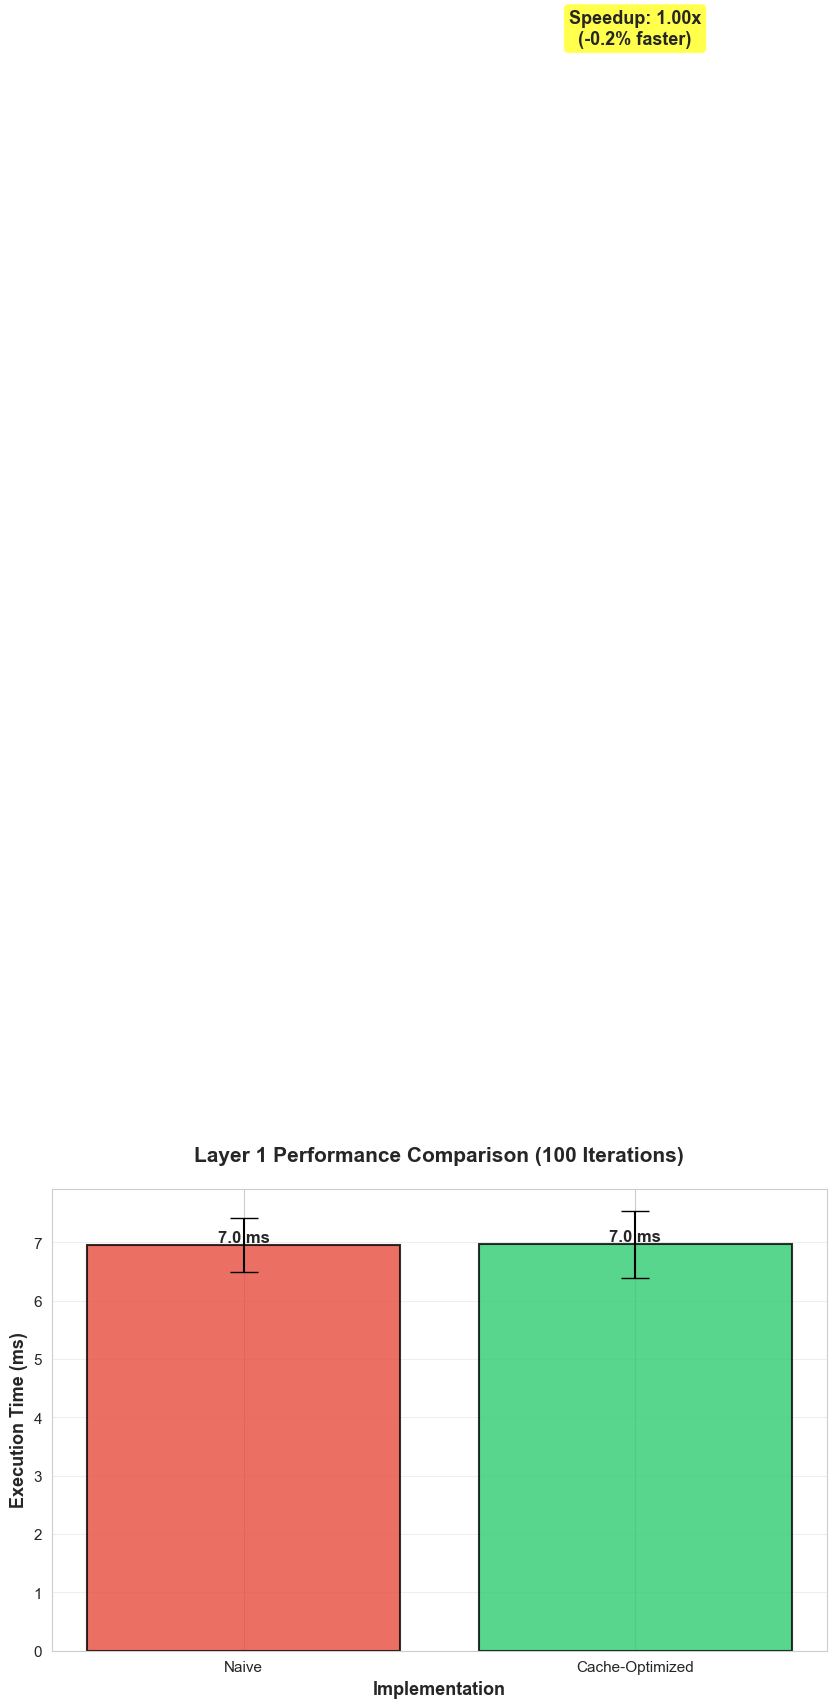

In [7]:
if df is not None:
    plot_comparison_bars(stats, speedup, improvement)

### Plot 2: Iteration-by-Iteration Timing

✓ Saved: plot2_iteration_timings.png


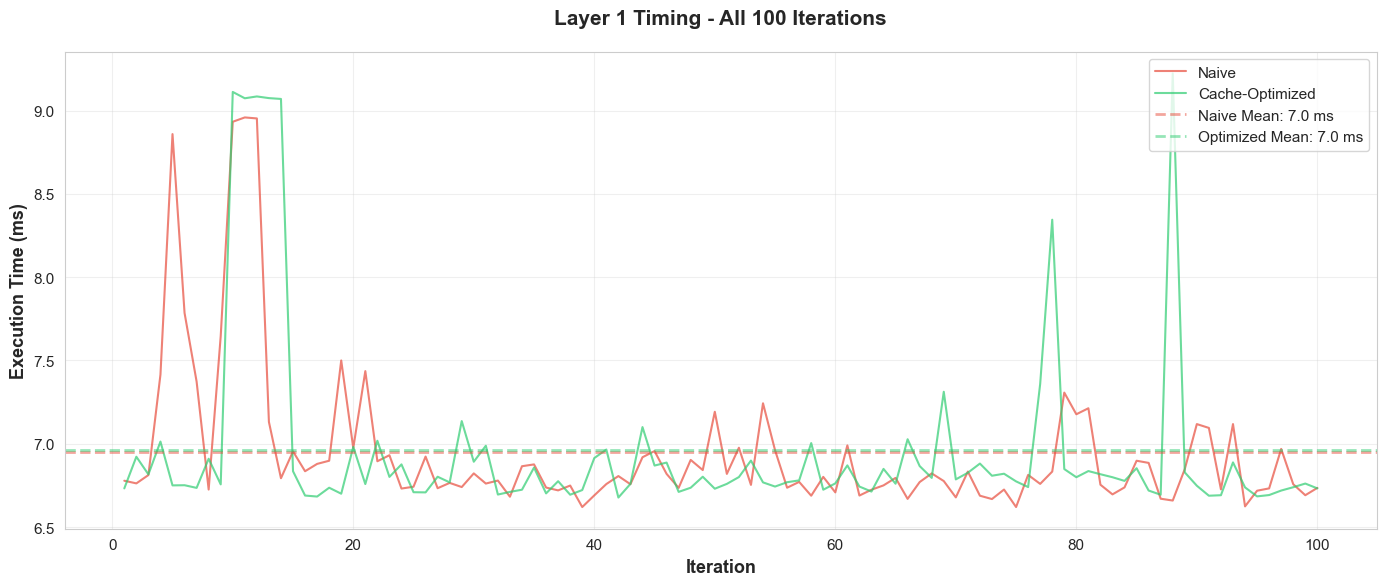

In [8]:
if df is not None:
    plot_iteration_timings(df)

### Plot 3: Speedup Visualization

C:\Users\AshAl\AppData\Local\Temp\ipykernel_63436\1117414027.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(data_to_plot, labels=['Naive', 'Cache-Optimized'],


✓ Saved: plot3_speedup_visualization.png


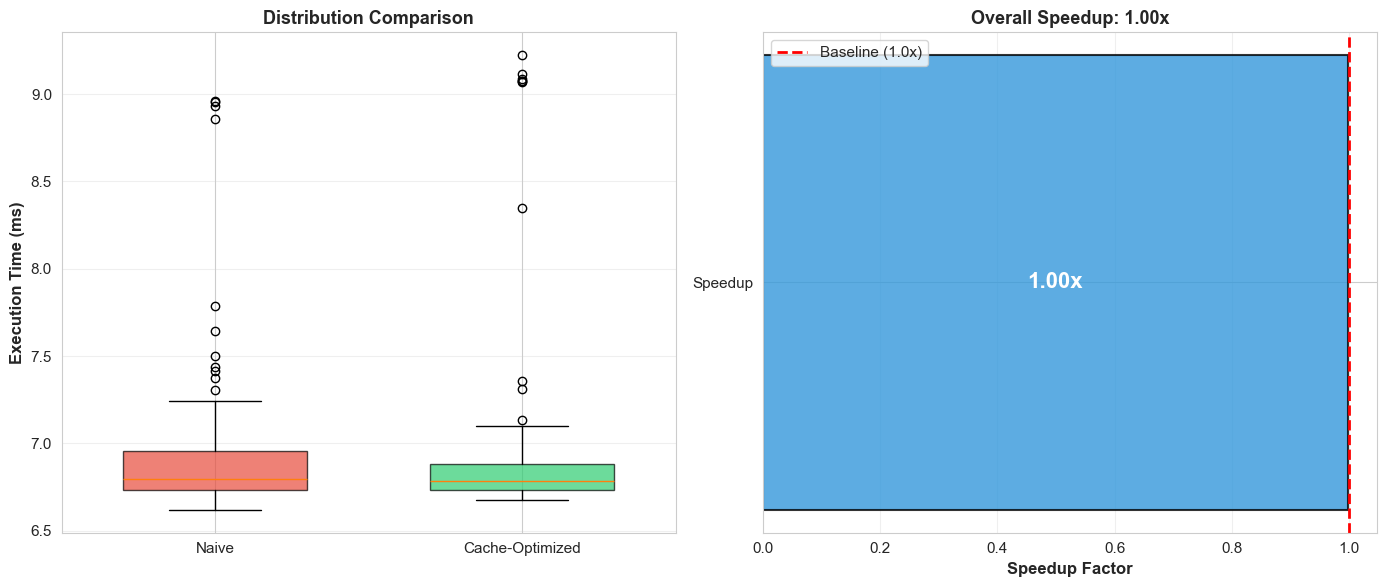

In [9]:
if df is not None:
    plot_speedup_visualization(df, speedup)

### Plot 4: Histogram Comparison

✓ Saved: plot4_histogram_comparison.png


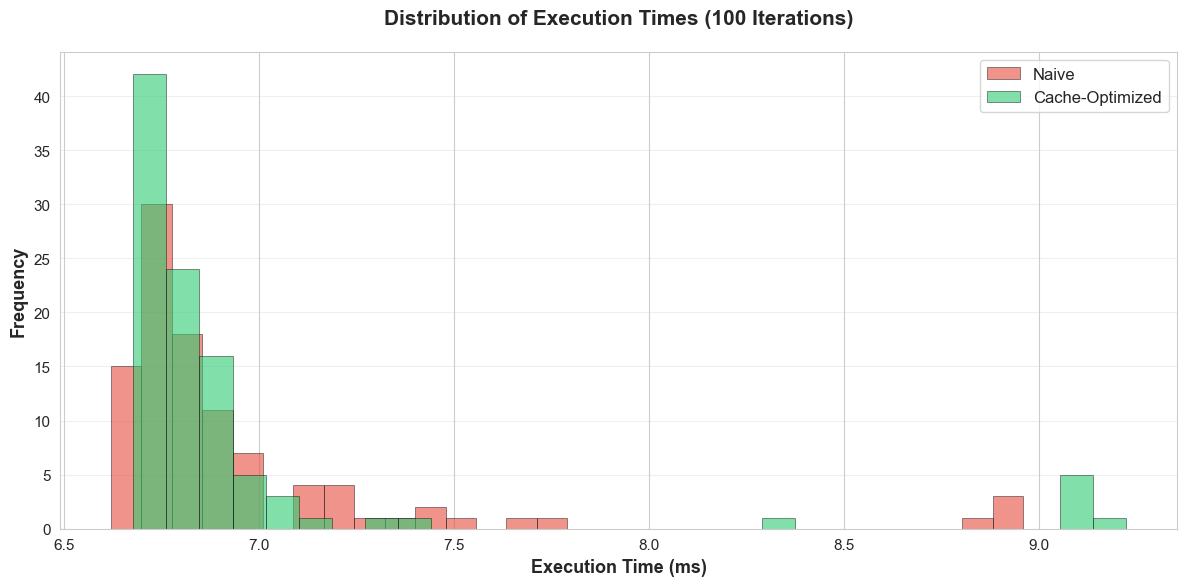

In [10]:
if df is not None:
    plot_histogram_comparison(df)

### Plot 5: Summary Table

✓ Saved: plot5_summary_table.png


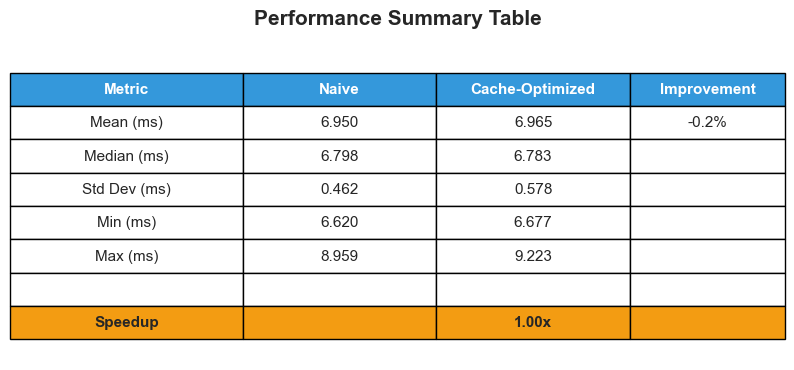

In [11]:
if df is not None:
    create_summary_table(stats, speedup, improvement)

## Summary

All visualizations have been generated! The following files are ready for your Lab 5 report:
- `plot1_performance_comparison.png`
- `plot2_iteration_timings.png`
- `plot3_speedup_visualization.png`
- `plot4_histogram_comparison.png`
- `plot5_summary_table.png`